# Import libraries and data

In [1]:
# To print multiple output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Import all required libraries
import pandas as pd # Data manipulation and analysis library
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition to check seasonality
from sklearn.feature_selection import RFE # RFE (Recursive Feature Elimination) is for feature selection
from sklearn.ensemble import RandomForestRegressor # Random forest modelling
import numpy as np # For arrays and mathematical operations
from statsmodels.tsa.stattools import adfuller # Dickey-fuller testto check stationarity of data
from sklearn.metrics import mean_squared_error # For evaluating the model
from sklearn.preprocessing import LabelEncoder # To encode categorical integer features
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # Statistical data visualization
import scipy.stats as stats # Statistical analysis
import pylab # For plotting
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly.express as px
import warnings # To handle warnings
warnings.filterwarnings("ignore") # Ignore all warings
from statsmodels.tsa.statespace.sarimax import SARIMAX # To do SARIMAX
from sklearn.model_selection import train_test_split # To split into train and test data set
from sklearn.preprocessing import StandardScaler # For RNN: Recursive neural network
from keras.models import Sequential # For RNN
from keras.layers import LSTM, Dense, Dropout # For RNN
from keras.optimizers import Adam # For RNN

/var/folders/yh/pl2cz6pd3rz655m2p297hdn40000gp/T/ipykernel_65959/2863653633.py:15: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/yh/pl2cz6pd3rz655m2p297hdn40000gp/T/ipykernel_65959/2863653633.py:16: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
# Ignore all warings
warnings.filterwarnings("ignore")

In [4]:
# Import data
# Import data
file_path = '/Users/deepakvarier/Downloads/hackathon_data'
date_format = "%d/%m/%y"
df = pd.read_csv(file_path+'/train.csv', sep = ',', parse_dates = ['week'], date_parser = lambda x: pd.to_datetime(x, format = date_format))

# Data cleaning

In [5]:
# Characteristics of data
df.head()
df.shape
df.info()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52


(150150, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [157]:
df_max_week = df['week'].max()

In [158]:
df_min_week = df['week'].min()

In [8]:
# Check null values in the data
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [9]:
# Since total no. of rows = 150150 and the null value is only in 1 row, therefore, we will remove the null row
# Calculate the total number of rows
total_rows = len(df)
# Calculate the number of rows with missing values
na_rows = df.isna().any(axis=1).sum()
if na_rows < total_rows * 0.01:
    df.dropna(inplace=True)
else:
    # Fill missing values with the average of store_id and sku_id combination
    df.fillna(df.groupby(['store_id', 'sku_id']).transform('mean'), inplace=True)
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [10]:
# Checking whether there are rows where the total_price or units_sold <=0
df.shape
df['total_price'].loc[df['total_price']<=0].count()
df['units_sold'].loc[df['units_sold']<=0].count()

(150149, 9)

0

0

In [11]:
# Delete rows with negative rows
con1 = df['units_sold']<=0
con2 = df['total_price']<=0
df = df[~(con1 & con2)]
df.shape

(150149, 9)

In [12]:
# Dropping duplicates if any
df.shape
df = df.drop_duplicates(['week', 'store_id', 'sku_id'])
df.shape

(150149, 9)

(150149, 9)

In [13]:
# Sort dataframe by date column in chronological order
df = df.sort_values(by='week', ascending=False)
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
150149,212644,2013-07-09,9984,679023,234.4125,234.4125,0,0,15
149427,211610,2013-07-09,9164,378934,213.0375,213.0375,0,0,16
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,162
149376,211531,2013-07-09,9112,216419,109.7250,109.7250,0,0,137
149377,211532,2013-07-09,9112,300021,109.0125,109.0125,0,0,108


# Data Selection (Partly)

In [14]:
# Function to create data frame for the selected store_id and sku_id
def create_dataframe(sku_id, df):
    # Filter the data for the specified store_id and sku_id
    filtered_data = df[(df['sku_id'] == sku_id)]

    # If no data is found for the specified sku_id, return None
    if filtered_data.empty:
        print("No data found for the specified sku_id.")
        return None

    return filtered_data

In [15]:
# Get user input for sku_id
sku_id = int(input("Enter sku_id: "))
store_id = int(input("Enter store_id: "))

#sku_id=216425

Enter sku_id: 216418
Enter store_id: 8091


In [16]:
type(sku_id)

int

In [17]:
# Call the function with user inputs to create dataframe of selected store_id and sku_id
df_selected = create_dataframe(sku_id,df)
if df_selected is not None:
    df_selected.head()
    df_selected.shape

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,162
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,140
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,74
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,45
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,63


(8840, 9)

In [18]:
#df_selected = df_selected.drop(columns=['record_ID', 'store_id'])

In [19]:
df_selected.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,162
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,140
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,74
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,45
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,63


In [20]:
# Group by sku_id and week and perform aggregation
#df_selected = df.groupby(['sku_id','week']).agg({
#    'total_price': 'mean',
#    'base_price': 'mean',
#    'is_featured_sku': 'max',
#    'is_display_sku': 'max',
#    'units_sold': 'sum'
#}).reset_index()

# Print the aggregated DataFrame
#print(df_selected)

# Data Pre-processing

In [21]:
# Pre-processing the data
def preprocess_data(df):
    # Convert 'week' column to datetime type and extract seasonality features
    df['week'] = pd.to_datetime(df['week'])
    df['month'] = df['week'].dt.month
    df['year'] = df['week'].dt.year
    df['day_of_week'] = df['week'].dt.dayofweek
    df['day_of_month'] = df['week'].dt.day
    df['discount'] = df['base_price'] - df['total_price']
    # Encode categorical variables 'is_featured_sku' and 'is_display_sku'
    label_encoder = LabelEncoder()
    df['is_featured_sku'] = label_encoder.fit_transform(df['is_featured_sku'])
    df['is_display_sku'] = label_encoder.fit_transform(df['is_display_sku'])
    
    return df

In [22]:
# Call the function to pre-process the data
df_processed = preprocess_data(df_selected)

In [23]:
df_processed.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,162,7,2013,1,9,0.0
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,140,7,2013,1,9,0.0
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,74,7,2013,1,9,0.0
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,45,7,2013,1,9,0.0
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,63,7,2013,1,9,0.0


In [24]:
#df_processed.drop(['week'], inplace=True, axis = 1)

In [25]:
df_processed.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,162,7,2013,1,9,0.0
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,140,7,2013,1,9,0.0
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,74,7,2013,1,9,0.0
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,45,7,2013,1,9,0.0
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,63,7,2013,1,9,0.0


In [26]:
# Check if the data is stationary
result = adfuller(df_processed['units_sold'].dropna())
# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.236053035856896
p-value: 1.0275640013347197e-22


In [27]:
# Since the p-value is below 0.05,
# the data can be assumed to be stationary hence we can proceed with the data without any transformation.

In [28]:
df_processed.shape

(8840, 14)

In [29]:
df_processed['units_sold'].skew()

2.3969726636205153

In [30]:
# units sold is highly positively skewed since skewness > 1

<Axes: >

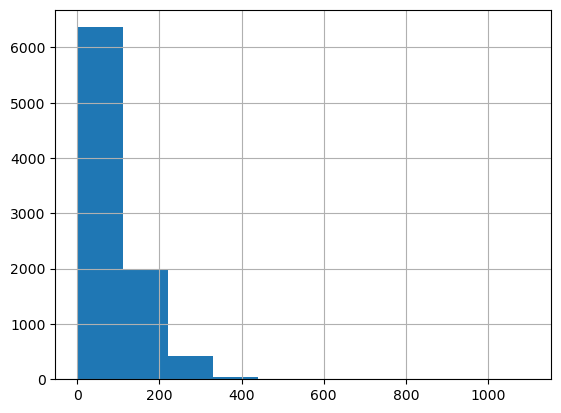

In [31]:
df_processed.units_sold.hist()

<Axes: xlabel='units_sold', ylabel='Density'>

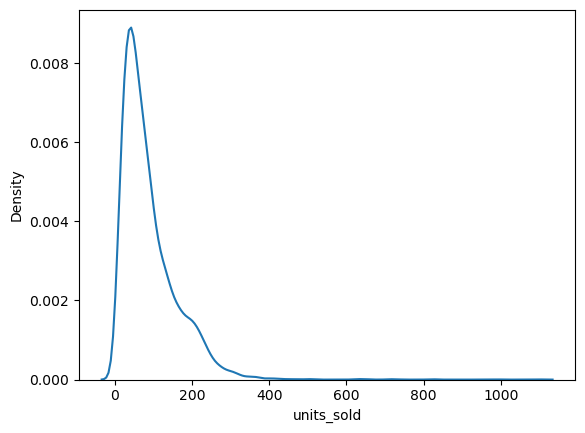

In [32]:
sns.kdeplot(df_processed.units_sold)

<Figure size 1600x500 with 0 Axes>

<Axes: >

<Axes: xlabel='units_sold', ylabel='Density'>

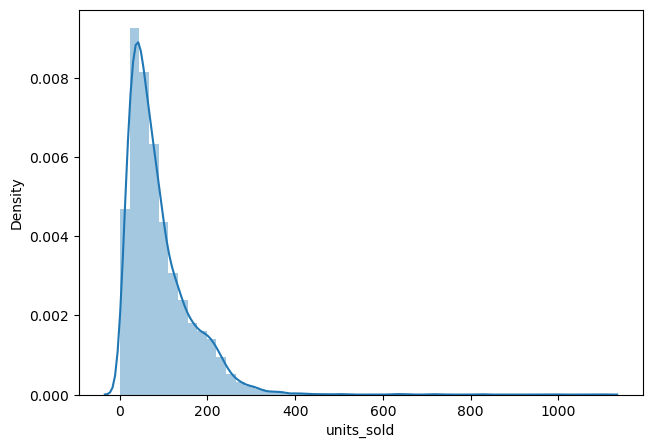

In [33]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_processed['units_sold'])
plt.show()

((array([-3.78002203, -3.55315481, -3.42852287, ...,  3.42852287,
          3.55315481,  3.78002203]),
  array([   1,    1,    1, ...,  825,  991, 1099])),
 (65.42171805422386, 88.92386877828054, 0.9095122752806173))

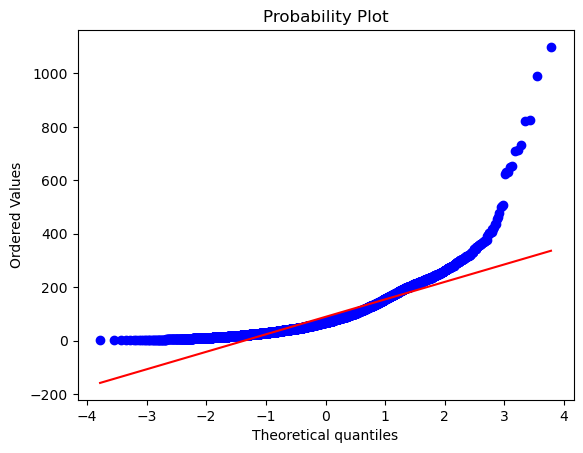

In [34]:
# Q-Q plot
stats.probplot(df_processed.units_sold, plot = pylab)

In [35]:
# Tail of the data
df_processed.loc[df_processed['store_id']==store_id].tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
4620,6553,2011-02-14,8091,216418,106.8750,106.8750,0,0,24,2,2011,0,14,0.000
3465,4913,2011-02-07,8091,216418,98.3250,98.3250,0,0,17,2,2011,0,7,0.000
2310,3277,2011-01-31,8091,216418,96.9000,96.9000,0,0,10,1,2011,0,31,0.000
1155,1641,2011-01-24,8091,216418,99.0375,111.8625,0,0,34,1,2011,0,24,12.825
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,1,2011,0,17,12.825


In [36]:
# Logarithmic transformation of data
df_processed['units_sold'] = np.log(df_processed['units_sold'])

In [37]:
# Tail of the data
df_processed.loc[df_processed['store_id']==store_id].tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
4620,6553,2011-02-14,8091,216418,106.8750,106.8750,0,0,3.178054,2,2011,0,14,0.000
3465,4913,2011-02-07,8091,216418,98.3250,98.3250,0,0,2.833213,2,2011,0,7,0.000
2310,3277,2011-01-31,8091,216418,96.9000,96.9000,0,0,2.302585,1,2011,0,31,0.000
1155,1641,2011-01-24,8091,216418,99.0375,111.8625,0,0,3.526361,1,2011,0,24,12.825
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,2.995732,1,2011,0,17,12.825


In [38]:
df_processed['units_sold'].skew()

-0.4681500384226393

<Figure size 1600x500 with 0 Axes>

<Axes: >

<Axes: xlabel='units_sold', ylabel='Density'>

<Axes: >

((array([-3.78002203, -3.55315481, -3.42852287, ...,  3.42852287,
          3.55315481,  3.78002203]),
  array([0.        , 0.        , 0.        , ..., 6.71538339, 6.89871453,
         7.00215595])),
 (0.8272750079295538, 4.179689663970701, 0.9931534920717102))

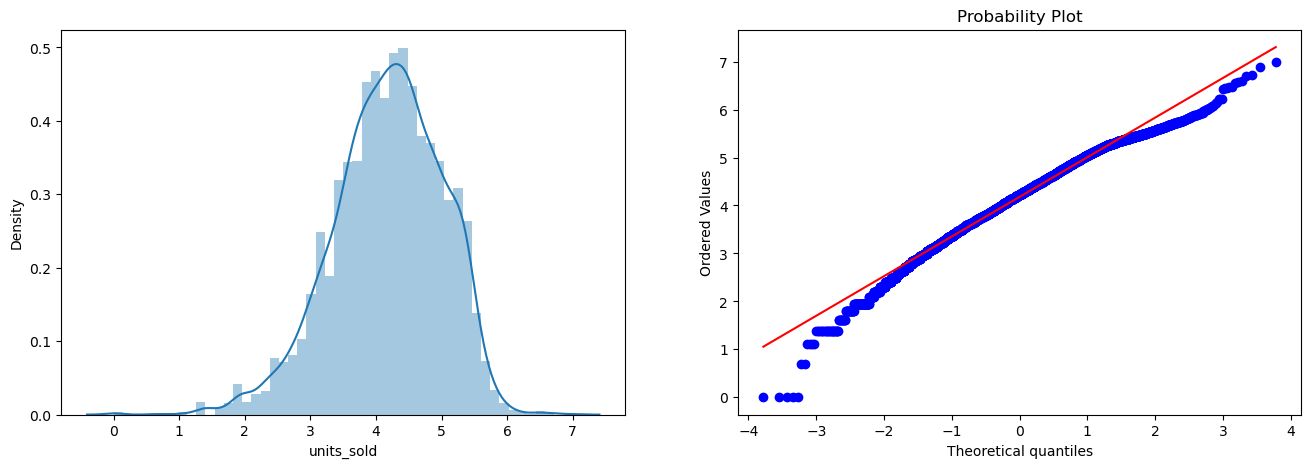

In [39]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_processed['units_sold'])
plt.subplot(1,2,2)
stats.probplot(df_processed['units_sold'], plot = pylab)
plt.show()

In [40]:
# Finding the boundary values
UL = df_processed['units_sold'].mean() + 3*df_processed['units_sold'].std()
LL = df_processed['units_sold'].mean() - 3*df_processed['units_sold'].std()
UL
LL

6.677765810601505

1.6816135173398958

In [41]:
df_processed.shape

(8840, 14)

In [42]:
df_processed['units_sold'].loc[df_processed['units_sold']<LL].count()

45

In [43]:
df_processed['units_sold'].loc[df_processed['units_sold']>UL].count()

4

In [44]:
# Removing outliers
condition1 = df_processed['units_sold']>UL
condition2 = df_processed['units_sold']<LL
df_processed = df_processed[~(condition1 & condition2)]

# Understanding the components of the data

In [45]:
# Seasonal decompose
df_processed.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,5.087596,7,2013,1,9,0.0
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,4.941642,7,2013,1,9,0.0
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,4.304065,7,2013,1,9,0.0
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,3.806662,7,2013,1,9,0.0
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,4.143135,7,2013,1,9,0.0


In [46]:
# Pre-processing for seasonal decompose
df_seasonal_decompose = df_processed
df_seasonal_decompose['week'] = pd.to_datetime(df_seasonal_decompose['week'])
df_seasonal_decompose = df_seasonal_decompose.set_index('week')
#store_id=8091
df_seasonal_decompose = df_seasonal_decompose[df_seasonal_decompose['store_id'] == store_id]

In [47]:
# Seasonal decomposition
result_seasonal_decompose = seasonal_decompose(df_seasonal_decompose['units_sold'], model='additive', period=52)  # Assuming weekly seasonality

<Figure size 1200x800 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

<Axes: >

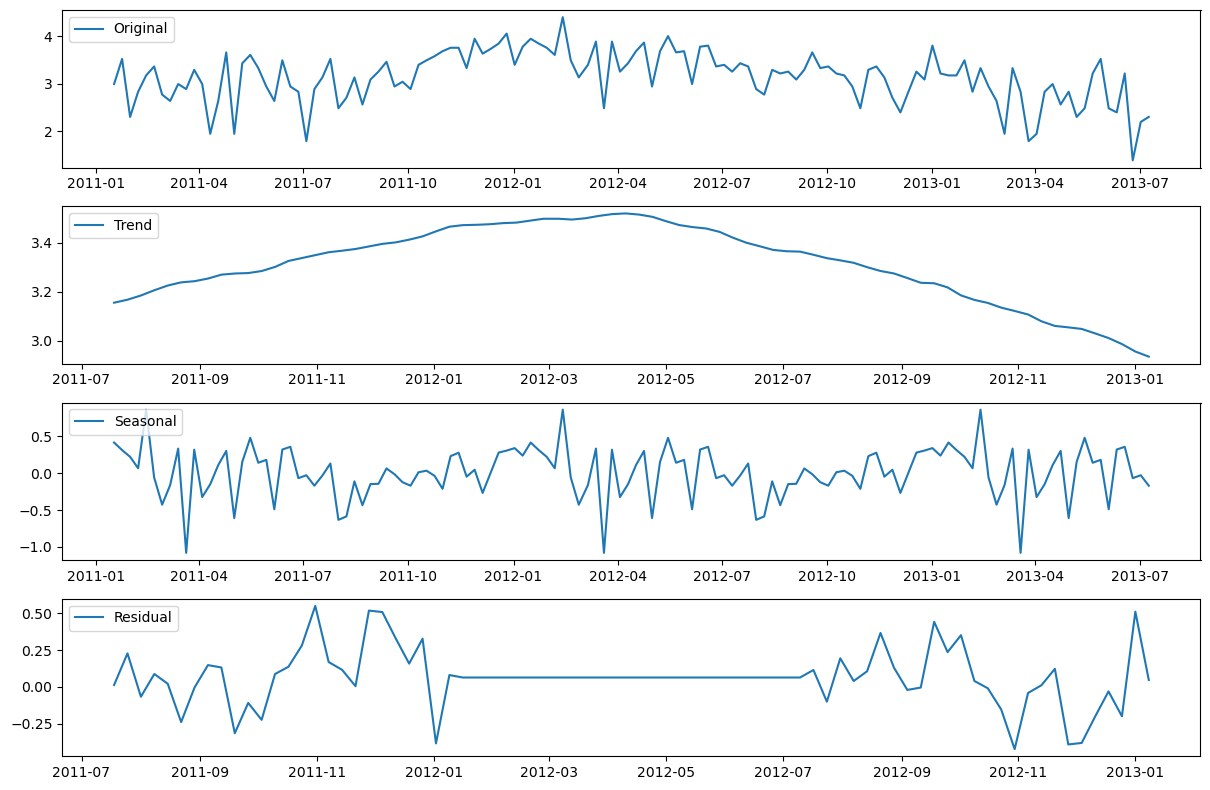

In [48]:
# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_seasonal_decompose['units_sold'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_seasonal_decompose.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_seasonal_decompose.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_seasonal_decompose.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
# Calculate metrics
#trend_mean = result.trend.mean()  # Mean of the trend component
#seasonal_mean = result.seasonal.mean()  # Mean of the seasonal component
#residual_std = result.resid.std()  # Standard deviation of the residual component

# Print insights
#print("Insights from Seasonal Decomposition:")
#print(f"Mean of Trend Component: {trend_mean}")
#print(f"Mean of Seasonal Component: {seasonal_mean}")
#print(f"Standard Deviation of Residual Component: {residual_std}")

# Random Forest

In [50]:
# Calculate the number of rows for testing
test_size = int(len(df_processed)*0.2)
end_point = len(df_processed)
x = end_point - test_size

In [51]:
df_processed.shape
test_size
end_point
x

(8840, 14)

1768

8840

7072

In [52]:
# Split into train and test
df_processed_train = df_processed.iloc[:x - 1]
df_processed_test = df_processed.iloc[x:]

In [161]:
max_training_week = df_processed_train['week'].max()
min_training_week = df_processed_train['week'].min()

In [53]:
# Check shape of test and train
df_processed_train.shape
df_processed_test.shape

(7071, 14)

(1768, 14)

In [54]:
# Processed data
df_processed_train.head()
df_processed_test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,5.087596,7,2013,1,9,0.0
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,4.941642,7,2013,1,9,0.0
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,4.304065,7,2013,1,9,0.0
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,3.806662,7,2013,1,9,0.0
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,4.143135,7,2013,1,9,0.0


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
29255,41405,2011-07-11,9112,216418,118.9875,119.7000,0,1,5.023881,7,2011,0,11,0.7125
29297,41474,2011-07-11,9164,216418,116.1375,106.1625,0,1,4.418841,7,2011,0,11,-9.9750
29283,41451,2011-07-11,9147,216418,118.9875,118.9875,0,0,4.317488,7,2011,0,11,0.0000
29236,41384,2011-07-11,9092,216418,69.1125,69.1125,0,0,3.784190,7,2011,0,11,0.0000
29181,41308,2011-07-11,8991,216418,69.8250,69.8250,0,0,4.077537,7,2011,0,11,0.0000


In [55]:
X_test = df_processed_test.loc[:, df_processed_test.columns != 'units_sold']
y_test = df_processed_test[['units_sold']]
X_train = df_processed_train.loc[:, df_processed_train.columns != 'units_sold']
y_train = df_processed_train[['units_sold']]

In [56]:
X_test.head()
y_test.head()
X_train.head()
y_train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount
29255,41405,2011-07-11,9112,216418,118.9875,119.7000,0,1,7,2011,0,11,0.7125
29297,41474,2011-07-11,9164,216418,116.1375,106.1625,0,1,7,2011,0,11,-9.9750
29283,41451,2011-07-11,9147,216418,118.9875,118.9875,0,0,7,2011,0,11,0.0000
29236,41384,2011-07-11,9092,216418,69.1125,69.1125,0,0,7,2011,0,11,0.0000
29181,41308,2011-07-11,8991,216418,69.8250,69.8250,0,0,7,2011,0,11,0.0000


,units_sold
29255,5.023881
29297,4.418841
29283,4.317488
29236,3.784190
29181,4.077537


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,7,2013,1,9,0.0
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,7,2013,1,9,0.0
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,7,2013,1,9,0.0
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,7,2013,1,9,0.0
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,7,2013,1,9,0.0


,units_sold
149375,5.087596
149417,4.941642
149403,4.304065
149356,3.806662
149301,4.143135


In [57]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [58]:
X_test_sarimax = X_test
y_test_sarimax = y_test
X_train_sarimax = X_train
y_train_sarimax = y_train

In [59]:
X_test.head()
y_test.head()
X_train.head()
y_train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount
0,41405,2011-07-11,9112,216418,118.9875,119.7000,0,1,7,2011,0,11,0.7125
1,41474,2011-07-11,9164,216418,116.1375,106.1625,0,1,7,2011,0,11,-9.9750
2,41451,2011-07-11,9147,216418,118.9875,118.9875,0,0,7,2011,0,11,0.0000
3,41384,2011-07-11,9092,216418,69.1125,69.1125,0,0,7,2011,0,11,0.0000
4,41308,2011-07-11,8991,216418,69.8250,69.8250,0,0,7,2011,0,11,0.0000


,units_sold
0,5.023881
1,4.418841
2,4.317488
3,3.784190
4,4.077537


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount
0,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,7,2013,1,9,0.0
1,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,7,2013,1,9,0.0
2,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,7,2013,1,9,0.0
3,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,7,2013,1,9,0.0
4,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,7,2013,1,9,0.0


,units_sold
0,5.087596
1,4.941642
2,4.304065
3,3.806662
4,4.143135


In [60]:
type(y_test)

pandas.core.frame.DataFrame

In [61]:
type(X_test)

pandas.core.frame.DataFrame

In [62]:
X_test.set_index('week', inplace=True)
X_train.set_index('week', inplace=True)

In [63]:
def train_random_forest(X_train, y_train):
    # Creating a Random Forest regressor
    #rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

    # Training the model
    #rf_regressor.fit(X_train, y_train)

    # Making predictions on the testing set
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor = RFE(estimator = rf_regressor, n_features_to_select=7)
    fit = rf_regressor.fit(X_train, y_train)
    y_pred = fit.predict(X_test)
    selected_features = X_train.columns[rf_regressor.support_]
    print("Selected Features:",selected_features)
    
    return y_pred, fit

In [64]:
y_pred, fit = train_random_forest(X_train,y_train)

Selected Features: Index(['record_ID', 'store_id', 'total_price', 'base_price', 'is_display_sku',
       'month', 'day_of_month'],
      dtype='object')


In [65]:
y_pred

array([5.11313863, 4.77454691, 4.04309527, ..., 5.32315111, 4.88205047,
       3.28997654])

# Evaluate Random Forest Model

In [66]:
#Evaluate accuracy using MAPE
y_true = np.array(y_test['units_sold'])
sumvalue=np.sum(y_true)
mape=np.sum(np.abs((y_true - y_pred)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 91.95 %.


In [67]:
# Find RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
print("MSE:",mse)

RMSE: 0.45974194406315844
MSE: 0.2113626551309723


In [68]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual units_sold')
    plt.ylabel('Predicted units_sold')
    plt.title('Actual vs. Predicted units_sold')
    plt.show()

In [69]:
y_test1 = y_test.values.flatten()

In [70]:
y_test1

array([5.02388052, 4.41884061, 4.31748811, ..., 4.47733681, 5.42934563,
       2.99573227])

In [71]:
actual_values_rf = np.exp(y_test1)
predicted_values_rf = np.exp(y_pred)
actual_values_rf = pd.DataFrame(actual_values_rf, columns=['actual_values_rf'])
predicted_values_rf = pd.DataFrame(predicted_values_rf, columns = ['predicted_values_rf'])

In [72]:
actual_values_rf
predicted_values_rf
X_test.reset_index(inplace = True)

,actual_values_rf
0,152.0
1,83.0
2,75.0
3,44.0
4,59.0
...,...
1763,65.0
1764,24.0
1765,88.0
1766,228.0


,predicted_values_rf
0,166.191149
1,118.456631
2,57.002508
3,48.250691
4,62.508541
...,...
1763,129.156057
1764,36.100967
1765,205.028935
1766,131.900846


In [73]:
merged_rf_df = pd.concat([X_test, actual_values_rf, predicted_values_rf], axis = 1)

In [164]:
merged_rf_df['predicted_values_rf'] = merged_rf_df['predicted_values_rf'].round(0)
merged_rf_df['actual_values_rf'] = merged_rf_df['actual_values_rf'].round(0)

In [75]:
merged_rf_df

,week,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount,actual_values_rf,predicted_values_rf
0,2011-07-11,41405,9112,216418,118.9875,119.7000,0,1,7,2011,0,11,0.7125,152.0,166.0
1,2011-07-11,41474,9164,216418,116.1375,106.1625,0,1,7,2011,0,11,-9.9750,83.0,118.0
2,2011-07-11,41451,9147,216418,118.9875,118.9875,0,0,7,2011,0,11,0.0000,75.0,57.0
3,2011-07-11,41384,9092,216418,69.1125,69.1125,0,0,7,2011,0,11,0.0000,44.0,48.0
4,2011-07-11,41308,8991,216418,69.8250,69.8250,0,0,7,2011,0,11,0.0000,59.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,2011-01-17,1062,9578,216418,97.6125,98.3250,0,1,1,2011,0,17,0.7125,65.0,129.0
1764,2011-01-17,1040,9532,216418,89.0625,89.0625,0,0,1,2011,0,17,0.0000,24.0,36.0
1765,2011-01-17,1082,9672,216418,98.3250,98.3250,0,1,1,2011,0,17,0.0000,88.0,205.0
1766,2011-01-17,1102,9611,216418,98.3250,98.3250,0,0,1,2011,0,17,0.0000,228.0,132.0


In [76]:
merged_rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week                 1768 non-null   datetime64[ns]
 1   record_ID            1768 non-null   int64         
 2   store_id             1768 non-null   int64         
 3   sku_id               1768 non-null   int64         
 4   total_price          1768 non-null   float64       
 5   base_price           1768 non-null   float64       
 6   is_featured_sku      1768 non-null   int64         
 7   is_display_sku       1768 non-null   int64         
 8   month                1768 non-null   int32         
 9   year                 1768 non-null   int32         
 10  day_of_week          1768 non-null   int32         
 11  day_of_month         1768 non-null   int32         
 12  discount             1768 non-null   float64       
 13  actual_values_rf     1768 non-nul

In [77]:
merged_rf_df['week'] = merged_rf_df.apply(lambda row: '-'.join([str(row['year']), str(row['month']), str(row['day_of_month'])]), axis=1)

In [78]:
merged_rf_df.head()

,week,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount,actual_values_rf,predicted_values_rf
0,2011-7-11,41405,9112,216418,118.9875,119.7000,0,1,7,2011,0,11,0.7125,152.0,166.0
1,2011-7-11,41474,9164,216418,116.1375,106.1625,0,1,7,2011,0,11,-9.9750,83.0,118.0
2,2011-7-11,41451,9147,216418,118.9875,118.9875,0,0,7,2011,0,11,0.0000,75.0,57.0
3,2011-7-11,41384,9092,216418,69.1125,69.1125,0,0,7,2011,0,11,0.0000,44.0,48.0
4,2011-7-11,41308,8991,216418,69.8250,69.8250,0,0,7,2011,0,11,0.0000,59.0,63.0


In [79]:
merged_rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   week                 1768 non-null   object 
 1   record_ID            1768 non-null   int64  
 2   store_id             1768 non-null   int64  
 3   sku_id               1768 non-null   int64  
 4   total_price          1768 non-null   float64
 5   base_price           1768 non-null   float64
 6   is_featured_sku      1768 non-null   int64  
 7   is_display_sku       1768 non-null   int64  
 8   month                1768 non-null   int32  
 9   year                 1768 non-null   int32  
 10  day_of_week          1768 non-null   int32  
 11  day_of_month         1768 non-null   int32  
 12  discount             1768 non-null   float64
 13  actual_values_rf     1768 non-null   float64
 14  predicted_values_rf  1768 non-null   float64
dtypes: float64(5), int32(4), int64(5), obj

In [80]:
merged_rf_df['week'] = pd.to_datetime(merged_rf_df['week'])

In [81]:
merged_rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week                 1768 non-null   datetime64[ns]
 1   record_ID            1768 non-null   int64         
 2   store_id             1768 non-null   int64         
 3   sku_id               1768 non-null   int64         
 4   total_price          1768 non-null   float64       
 5   base_price           1768 non-null   float64       
 6   is_featured_sku      1768 non-null   int64         
 7   is_display_sku       1768 non-null   int64         
 8   month                1768 non-null   int32         
 9   year                 1768 non-null   int32         
 10  day_of_week          1768 non-null   int32         
 11  day_of_month         1768 non-null   int32         
 12  discount             1768 non-null   float64       
 13  actual_values_rf     1768 non-nul

In [82]:
merged_rf_df.head()

,week,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount,actual_values_rf,predicted_values_rf
0,2011-07-11,41405,9112,216418,118.9875,119.7000,0,1,7,2011,0,11,0.7125,152.0,166.0
1,2011-07-11,41474,9164,216418,116.1375,106.1625,0,1,7,2011,0,11,-9.9750,83.0,118.0
2,2011-07-11,41451,9147,216418,118.9875,118.9875,0,0,7,2011,0,11,0.0000,75.0,57.0
3,2011-07-11,41384,9092,216418,69.1125,69.1125,0,0,7,2011,0,11,0.0000,44.0,48.0
4,2011-07-11,41308,8991,216418,69.8250,69.8250,0,0,7,2011,0,11,0.0000,59.0,63.0


In [83]:
columns_to_drop_rf = ['record_ID', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'month', 'year', 'day_of_week', 'day_of_month', 'discount']

In [84]:
merged_rf_df = merged_rf_df.drop(columns=columns_to_drop_rf)

In [85]:
merged_rf_df.head()

,week,store_id,sku_id,actual_values_rf,predicted_values_rf
0,2011-07-11,9112,216418,152.0,166.0
1,2011-07-11,9164,216418,83.0,118.0
2,2011-07-11,9147,216418,75.0,57.0
3,2011-07-11,9092,216418,44.0,48.0
4,2011-07-11,8991,216418,59.0,63.0


In [86]:
# merged_rf_df.set_index('week', inplace=True)

In [87]:
merged_rf_df.head()

,week,store_id,sku_id,actual_values_rf,predicted_values_rf
0,2011-07-11,9112,216418,152.0,166.0
1,2011-07-11,9164,216418,83.0,118.0
2,2011-07-11,9147,216418,75.0,57.0
3,2011-07-11,9092,216418,44.0,48.0
4,2011-07-11,8991,216418,59.0,63.0


In [88]:
type(merged_rf_df)

pandas.core.frame.DataFrame

In [89]:
type(store_id)

int

In [90]:
merged_rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week                 1768 non-null   datetime64[ns]
 1   store_id             1768 non-null   int64         
 2   sku_id               1768 non-null   int64         
 3   actual_values_rf     1768 non-null   float64       
 4   predicted_values_rf  1768 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 69.2 KB


In [91]:
condition1_rf = merged_rf_df['sku_id']  == sku_id
condition2_rf = merged_rf_df['store_id'] == store_id

In [92]:
merged_rf_df = merged_rf_df[(condition1_rf.values) & (condition2_rf.values)]
merged_rf_df.head()

,week,store_id,sku_id,actual_values_rf,predicted_values_rf
15,2011-07-11,8091,216418,18.0,21.0
83,2011-07-04,8091,216418,6.0,14.0
156,2011-06-27,8091,216418,17.0,20.0
212,2011-06-20,8091,216418,19.0,23.0
287,2011-06-13,8091,216418,33.0,27.0


In [93]:
comp_rf_df = merged_rf_df

In [94]:
comp_rf_df.head()

,week,store_id,sku_id,actual_values_rf,predicted_values_rf
15,2011-07-11,8091,216418,18.0,21.0
83,2011-07-04,8091,216418,6.0,14.0
156,2011-06-27,8091,216418,17.0,20.0
212,2011-06-20,8091,216418,19.0,23.0
287,2011-06-13,8091,216418,33.0,27.0


Text(0.5, 0, 'Weeks')

Text(0, 0.5, 'Demand')

Text(0.5, 1.0, 'Actutal Values Vs Predicted values')

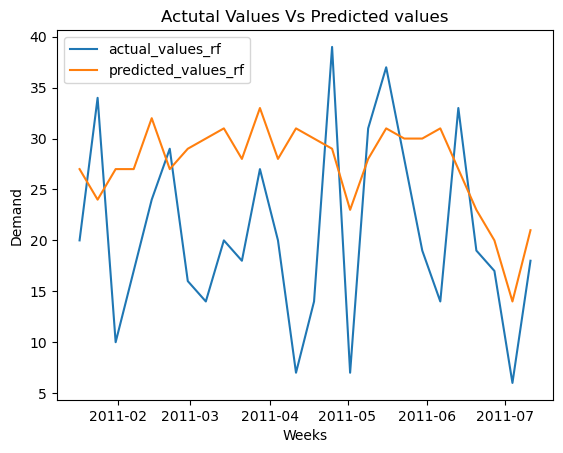

In [95]:
# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot two separate lines for each column
ax.plot(comp_rf_df['week'], comp_rf_df['actual_values_rf'], label='actual_values_rf')
ax.plot(comp_rf_df['week'], comp_rf_df['predicted_values_rf'], label='predicted_values_rf')

# Set labels and title
# Set labels and title
ax.set_xlabel('Weeks')
ax.set_ylabel('Demand')
ax.set_title('Actutal Values Vs Predicted values')

# Add legend
ax.legend()

# Store the plot in a variable
comp = fig

# Show the plot
plt.show()

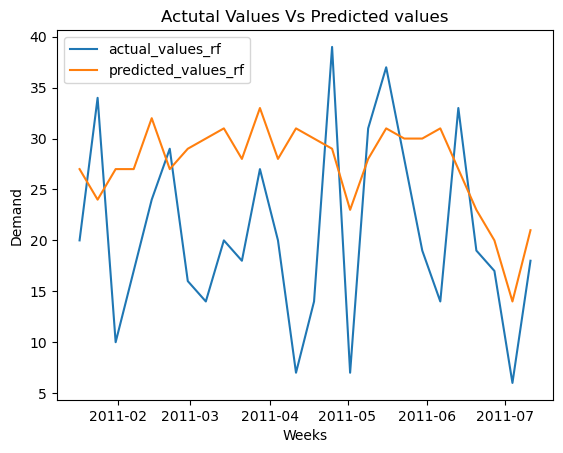

In [96]:
comp

# Recurrent Neural network Model

In [97]:
# Starting RNN (Recurrent Neural Network)
df_nrr = df_processed
df_nrr.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
149375,211530,2013-07-09,9112,216418,110.4375,110.4375,0,0,5.087596,7,2013,1,9,0.0
149417,211599,2013-07-09,9164,216418,109.7250,109.7250,0,0,4.941642,7,2013,1,9,0.0
149403,211576,2013-07-09,9147,216418,109.7250,109.7250,0,0,4.304065,7,2013,1,9,0.0
149356,211509,2013-07-09,9092,216418,86.9250,86.9250,0,0,3.806662,7,2013,1,9,0.0
149301,211433,2013-07-09,8991,216418,87.6375,87.6375,0,0,4.143135,7,2013,1,9,0.0


In [98]:
# Drop unnecessary columns
df_nrr = df_nrr.drop(columns=['record_ID', 'week'])  # Drop unnecessary columns

In [99]:
# Normalize numerical features
scaler = StandardScaler()
df_nrr[['total_price', 'base_price']] = scaler.fit_transform(df_nrr[['total_price', 'base_price']])

In [100]:
df_nrr.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year,day_of_week,day_of_month,discount
149375,9112,216418,1.298610,1.239105,0,0,5.087596,7,2013,1,9,0.0
149417,9164,216418,1.248473,1.183047,0,0,4.941642,7,2013,1,9,0.0
149403,9147,216418,1.248473,1.183047,0,0,4.304065,7,2013,1,9,0.0
149356,9092,216418,-0.355896,-0.610792,0,0,3.806662,7,2013,1,9,0.0
149301,8991,216418,-0.305759,-0.554734,0,0,4.143135,7,2013,1,9,0.0


In [101]:
# Split data into features (X) and target (y)
X_nrr = df_nrr.drop(columns=['units_sold'])
y_nrr = df_nrr['units_sold']

In [102]:
# Split data into training and testing sets
X_nrr_train, X_nrr_test, y_nrr_train, y_nrr_test = train_test_split(X_nrr, y_nrr, test_size=0.2, random_state=42)

In [103]:
# Reshape input data for LSTM
X_nrr_train = np.array(X_nrr_train).reshape(X_nrr_train.shape[0], X_nrr_train.shape[1], 1)
X_nrr_test = np.array(X_nrr_test).reshape(X_nrr_test.shape[0], X_nrr_test.shape[1], 1)

In [104]:
y_nrr.head()

149375    5.087596
149417    4.941642
149403    4.304065
149356    3.806662
149301    4.143135
Name: units_sold, dtype: float64

In [105]:
#X_nrr.head()

In [106]:
# Define the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_nrr_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [107]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [108]:
# Train the model
model.fit(X_nrr_train, y_nrr_train, epochs=10, batch_size=32, validation_data=(X_nrr_test, y_nrr_test))

Epoch 1/10
221/221 [==============================] - 5s 13ms/step - loss: 1.4095 - val_loss: 0.7395
Epoch 2/10
221/221 [==============================] - 1s 7ms/step - loss: 0.7051 - val_loss: 0.5882
Epoch 3/10
221/221 [==============================] - 1s 6ms/step - loss: 0.6315 - val_loss: 0.5710
Epoch 4/10
221/221 [==============================] - 1s 7ms/step - loss: 0.6013 - val_loss: 0.5782
Epoch 5/10
221/221 [==============================] - 1s 7ms/step - loss: 0.6192 - val_loss: 0.5625
Epoch 6/10
221/221 [==============================] - 2s 7ms/step - loss: 0.6002 - val_loss: 0.5609
Epoch 7/10
221/221 [==============================] - 2s 7ms/step - loss: 0.5976 - val_loss: 0.5718
Epoch 8/10
221/221 [==============================] - 1s 6ms/step - loss: 0.5943 - val_loss: 0.5565
Epoch 9/10
221/221 [==============================] - 1s 7ms/step - loss: 0.5901 - val_loss: 0.5508
Epoch 10/10
221/221 [==============================] - 1s 6ms/step - loss: 0.5769 - val_loss: 0.549

# Evaluate Recurrent Neural Network Model

In [109]:
# Evaluate the model
y_nrr_pred = model.predict(X_nrr_test).flatten()
rmse_nrr = np.sqrt(mean_squared_error(y_nrr_test, y_nrr_pred))
mape_nrr = np.mean(np.abs((y_nrr_test - y_nrr_pred) / y_nrr_test)) * 100
loss_nrr = model.evaluate(X_nrr_test, y_nrr_test)

print("Test Loss:", loss_nrr)
print("Root Mean Squared Error (RMSE):", rmse_nrr)
print("Mean Absolute Percentage Error (MAPE):", mape_nrr)

56/56 [==============================] - 0s 2ms/step - loss: 0.5494
Test Loss: 0.5494303107261658
Root Mean Squared Error (RMSE): 0.7412356324232751
Mean Absolute Percentage Error (MAPE): inf


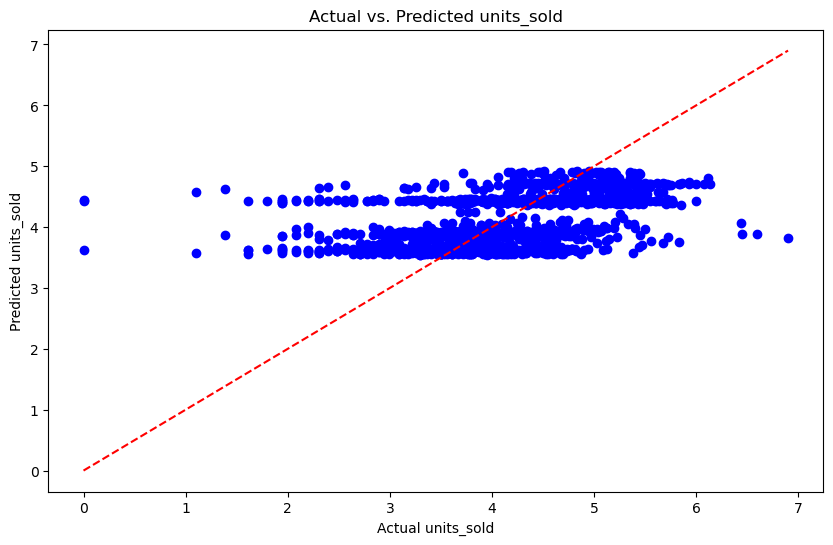

In [110]:
plot_predictions(y_nrr_test, y_nrr_pred)

In [111]:
rmse, rmse_nrr

(0.45974194406315844, 0.7412356324232751)

In [112]:
# Find RMSE
mse_nrr = mean_squared_error(y_nrr_test, y_nrr_pred)
rmse_nrr = np.sqrt(mse_nrr)
print("RMSE:",rmse_nrr)
print("MSE:",mse_nrr)

RMSE: 0.7412356324232751
MSE: 0.5494302627739325


In [113]:
#Evaluate accuracy using MAPE
y_nrr_true = np.array(y_nrr_test)
sumvalue=np.sum(y_nrr_true)
mape_nrr=np.sum(np.abs((y_nrr_true - y_nrr_pred)))/sumvalue*100
accuracy_nrr=100-mape_nrr
print('Accuracy:', round(accuracy_nrr,2),'%.')

Accuracy: 86.53 %.


In [114]:
y_nrr_pred

array([4.3798623, 3.8713446, 3.7493665, ..., 4.435361 , 3.8918242,
       3.9191353], dtype=float32)

In [115]:
y_nrr_true

array([4.92725369, 3.55534806, 4.00733319, ..., 4.18965474, 4.20469262,
       3.33220451])

In [116]:
actual_values_nrr = np.exp(y_nrr_true)
predicted_values_nrr = np.exp(y_nrr_pred)
comp_nrr = pd.DataFrame(data=[actual_values_nrr,predicted_values_nrr]).T
comp_nrr.columns=['y_nrr_test','y_nrr_pred']
comp_nrr

,y_nrr_test,y_nrr_pred
0,138.0,79.827042
1,35.0,48.006889
2,55.0,42.494156
3,94.0,35.908718
4,157.0,51.544071
...,...,...
1763,114.0,86.155014
1764,62.0,37.066128
1765,66.0,84.382576
1766,67.0,49.000195


In [117]:
actual_values_nrr = pd.DataFrame(actual_values_nrr, columns=['actual_values_nrr'])
predicted_values_nrr = pd.DataFrame(predicted_values_nrr, columns = ['predicted_values_nrr'])

In [118]:
X_nrr.head()
y_nrr.head()
X_nrr.shape
y_nrr.shape

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount
149375,9112,216418,1.298610,1.239105,0,0,7,2013,1,9,0.0
149417,9164,216418,1.248473,1.183047,0,0,7,2013,1,9,0.0
149403,9147,216418,1.248473,1.183047,0,0,7,2013,1,9,0.0
149356,9092,216418,-0.355896,-0.610792,0,0,7,2013,1,9,0.0
149301,8991,216418,-0.305759,-0.554734,0,0,7,2013,1,9,0.0


149375    5.087596
149417    4.941642
149403    4.304065
149356    3.806662
149301    4.143135
Name: units_sold, dtype: float64

(8840, 11)

(8840,)

In [119]:
# Calculate the number of rows to keep (20% of total rows)
num_rows_to_keep_nrr = int(len(X_nrr) * 0.2)

# Slice the DataFrame to keep the last 20% of the data
X_nrr_df_test = X_nrr[-num_rows_to_keep_nrr:]
y_nrr_df_test  = y_nrr[-num_rows_to_keep_nrr:]

In [120]:
X_nrr_df_test.reset_index(inplace = True)

In [121]:
X_nrr_df_test.head()
actual_values_nrr
predicted_values_nrr

,index,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount
0,29255,9112,216418,1.900248,1.967852,0,1,7,2011,0,11,0.7125
1,29297,9164,216418,1.699702,0.902760,0,1,7,2011,0,11,-9.9750
2,29283,9147,216418,1.900248,1.911794,0,0,7,2011,0,11,0.0000
3,29236,9092,216418,-1.609309,-2.012228,0,0,7,2011,0,11,0.0000
4,29181,8991,216418,-1.559173,-1.956171,0,0,7,2011,0,11,0.0000


,actual_values_nrr
0,138.0
1,35.0
2,55.0
3,94.0
4,157.0
...,...
1763,114.0
1764,62.0
1765,66.0
1766,67.0


,predicted_values_nrr
0,79.827042
1,48.006889
2,42.494156
3,35.908718
4,51.544071
...,...
1763,86.155014
1764,37.066128
1765,84.382576
1766,49.000195


In [122]:
X_nrr_df_test.head()

,index,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount
0,29255,9112,216418,1.900248,1.967852,0,1,7,2011,0,11,0.7125
1,29297,9164,216418,1.699702,0.902760,0,1,7,2011,0,11,-9.9750
2,29283,9147,216418,1.900248,1.911794,0,0,7,2011,0,11,0.0000
3,29236,9092,216418,-1.609309,-2.012228,0,0,7,2011,0,11,0.0000
4,29181,8991,216418,-1.559173,-1.956171,0,0,7,2011,0,11,0.0000


In [123]:
merged_nrr_df = pd.concat([X_nrr_df_test, actual_values_nrr, predicted_values_nrr], axis = 1)

In [124]:
merged_nrr_df

,index,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount,actual_values_nrr,predicted_values_nrr
0,29255,9112,216418,1.900248,1.967852,0,1,7,2011,0,11,0.7125,138.0,79.827042
1,29297,9164,216418,1.699702,0.902760,0,1,7,2011,0,11,-9.9750,35.0,48.006889
2,29283,9147,216418,1.900248,1.911794,0,0,7,2011,0,11,0.0000,55.0,42.494156
3,29236,9092,216418,-1.609309,-2.012228,0,0,7,2011,0,11,0.0000,94.0,35.908718
4,29181,8991,216418,-1.559173,-1.956171,0,0,7,2011,0,11,0.0000,157.0,51.544071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,753,9578,216418,0.396152,0.286128,0,1,1,2011,0,17,0.7125,114.0,86.155014
1764,734,9532,216418,-0.205486,-0.442619,0,0,1,2011,0,17,0.0000,62.0,37.066128
1765,763,9672,216418,0.446289,0.286128,0,1,1,2011,0,17,0.0000,66.0,84.382576
1766,776,9611,216418,0.446289,0.286128,0,0,1,2011,0,17,0.0000,67.0,49.000195


In [165]:
merged_nrr_df['predicted_values_nrr'] = merged_nrr_df['predicted_values_nrr'].round(0)
merged_nrr_df['actual_values_nrr'] = merged_nrr_df['actual_values_nrr'].round(0)

In [126]:
merged_nrr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1768 non-null   int64  
 1   store_id              1768 non-null   int64  
 2   sku_id                1768 non-null   int64  
 3   total_price           1768 non-null   float64
 4   base_price            1768 non-null   float64
 5   is_featured_sku       1768 non-null   int64  
 6   is_display_sku        1768 non-null   int64  
 7   month                 1768 non-null   int32  
 8   year                  1768 non-null   int32  
 9   day_of_week           1768 non-null   int32  
 10  day_of_month          1768 non-null   int32  
 11  discount              1768 non-null   float64
 12  actual_values_nrr     1768 non-null   float64
 13  predicted_values_nrr  1768 non-null   float32
dtypes: float32(1), float64(4), int32(4), int64(5)
memory usage: 159.0 KB


In [127]:
merged_nrr_df['week'] = merged_nrr_df.apply(lambda row: '-'.join([str(row['year']), str(row['month']), str(row['day_of_month'])]), axis=1)

In [128]:
merged_nrr_df['week'] = merged_nrr_df.apply(lambda row: '-'.join([str(row['year']), str(row['month']), str(row['day_of_month'])]), axis=1)

In [129]:
merged_nrr_df

,index,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount,actual_values_nrr,predicted_values_nrr,week
0,29255,9112,216418,1.900248,1.967852,0,1,7,2011,0,11,0.7125,138.0,80.0,2011-7-11
1,29297,9164,216418,1.699702,0.902760,0,1,7,2011,0,11,-9.9750,35.0,48.0,2011-7-11
2,29283,9147,216418,1.900248,1.911794,0,0,7,2011,0,11,0.0000,55.0,42.0,2011-7-11
3,29236,9092,216418,-1.609309,-2.012228,0,0,7,2011,0,11,0.0000,94.0,36.0,2011-7-11
4,29181,8991,216418,-1.559173,-1.956171,0,0,7,2011,0,11,0.0000,157.0,52.0,2011-7-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,753,9578,216418,0.396152,0.286128,0,1,1,2011,0,17,0.7125,114.0,86.0,2011-1-17
1764,734,9532,216418,-0.205486,-0.442619,0,0,1,2011,0,17,0.0000,62.0,37.0,2011-1-17
1765,763,9672,216418,0.446289,0.286128,0,1,1,2011,0,17,0.0000,66.0,84.0,2011-1-17
1766,776,9611,216418,0.446289,0.286128,0,0,1,2011,0,17,0.0000,67.0,49.0,2011-1-17


In [130]:
merged_nrr_df['week'] = pd.to_datetime(merged_nrr_df['week'])

In [131]:
merged_nrr_df.head()

,index,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,year,day_of_week,day_of_month,discount,actual_values_nrr,predicted_values_nrr,week
0,29255,9112,216418,1.900248,1.967852,0,1,7,2011,0,11,0.7125,138.0,80.0,2011-07-11
1,29297,9164,216418,1.699702,0.902760,0,1,7,2011,0,11,-9.9750,35.0,48.0,2011-07-11
2,29283,9147,216418,1.900248,1.911794,0,0,7,2011,0,11,0.0000,55.0,42.0,2011-07-11
3,29236,9092,216418,-1.609309,-2.012228,0,0,7,2011,0,11,0.0000,94.0,36.0,2011-07-11
4,29181,8991,216418,-1.559173,-1.956171,0,0,7,2011,0,11,0.0000,157.0,52.0,2011-07-11


In [132]:
columns_to_drop_nrr = ['index', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'month', 'year', 'day_of_week', 'day_of_month', 'discount']

In [133]:
merged_nrr_df = merged_nrr_df.drop(columns=columns_to_drop_nrr)

In [134]:
merged_nrr_df.head()

,store_id,sku_id,actual_values_nrr,predicted_values_nrr,week
0,9112,216418,138.0,80.0,2011-07-11
1,9164,216418,35.0,48.0,2011-07-11
2,9147,216418,55.0,42.0,2011-07-11
3,9092,216418,94.0,36.0,2011-07-11
4,8991,216418,157.0,52.0,2011-07-11


In [135]:
merged_nrr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store_id              1768 non-null   int64         
 1   sku_id                1768 non-null   int64         
 2   actual_values_nrr     1768 non-null   float64       
 3   predicted_values_nrr  1768 non-null   float32       
 4   week                  1768 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(1), int64(2)
memory usage: 62.3 KB


In [136]:
condition1_nrr = merged_nrr_df['sku_id']  == sku_id
condition2_nrr = merged_nrr_df['store_id'] == store_id

In [137]:
merged_nrr_df = merged_nrr_df[(condition1_nrr.values) & (condition2_nrr.values)]
merged_nrr_df.head()

,store_id,sku_id,actual_values_nrr,predicted_values_nrr,week
15,8091,216418,24.0,103.0,2011-07-11
83,8091,216418,119.0,38.0,2011-07-04
156,8091,216418,182.0,85.0,2011-06-27
212,8091,216418,130.0,83.0,2011-06-20
287,8091,216418,374.0,111.0,2011-06-13


In [138]:
comp_nrr_df = merged_nrr_df

Text(0.5, 0, 'Weeks')

Text(0, 0.5, 'Demand')

Text(0.5, 1.0, 'Actutal Values Vs Predicted values')

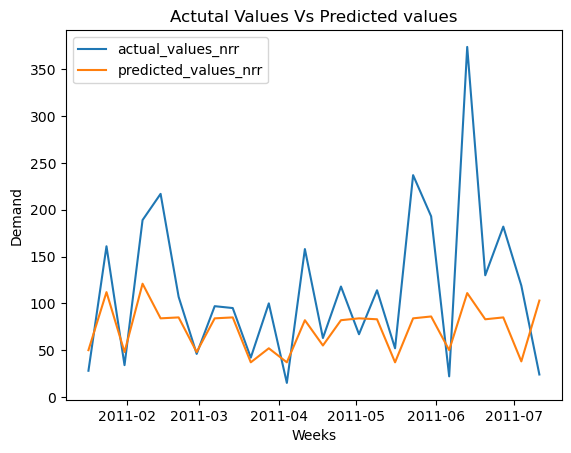

In [139]:
# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot two separate lines for each column
ax.plot(comp_nrr_df['week'], comp_nrr_df['actual_values_nrr'], label='actual_values_nrr')
ax.plot(comp_nrr_df['week'], comp_nrr_df['predicted_values_nrr'], label='predicted_values_nrr')

# Set labels and title
# Set labels and title
ax.set_xlabel('Weeks')
ax.set_ylabel('Demand')
ax.set_title('Actutal Values Vs Predicted values')

# Add legend
ax.legend()

# Store the plot in a variable
comp_nrr = fig

# Show the plot
plt.show()

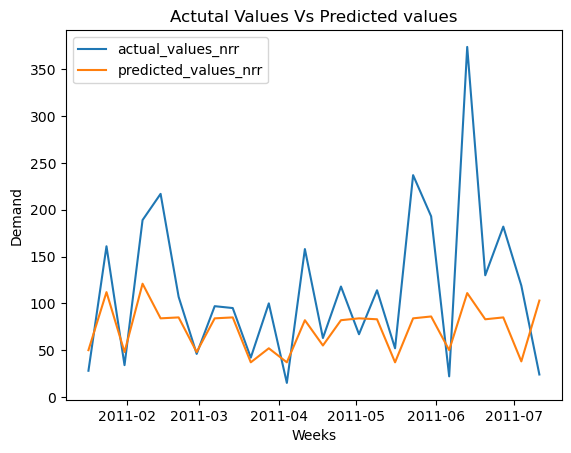

In [140]:
comp_nrr

In [141]:
rmse, rmse_nrr

(0.45974194406315844, 0.7412356324232751)

# Comparison of both the models - Random Forest Vs Recurrent Neural Network

In [142]:
# Create a DataFrame for evaluation
rmse_rf = round(rmse,2)
rmse_nrr = round(rmse_nrr,2)
accuracy_rf = str(round(accuracy,2)) + "%"
accuracy_nrr = str(round(accuracy_nrr,2)) + "%"

data_evaluation = {
    'Param':['RMSE', 'Accuracy'],
    'Random Forest': [rmse_rf, accuracy_rf],
    'Recursive Neural Network': [rmse_nrr,accuracy_nrr ],
}

index = ['0','1']
df_evaluation = pd.DataFrame(data_evaluation, index=index)

# Display the DataFrame
print(df_evaluation)

      Param Random Forest Recursive Neural Network
0      RMSE          0.46                     0.74
1  Accuracy        91.95%                   86.53%


# Re-order Point

In [143]:
# Calculation of safety stock factor
def calculate_safety_factor(desired_service_level, standard_deviation):
    # Calculation Z-score corresponding to the desired service level
    z_score = stats.norm.ppf(desired_service_level)
    
    #Calculate safety factor
    safety_factor = z_score * standard_deviation
    
    return safety_factor

In [144]:
# Get desired service level
#desired_service_level = float(input("Enter desired service level (ex: 0.95 for 95%): "))
desired_service_level = 0.9

In [145]:
# Calculation of standard_deviation
filtered_df = df_processed[(df['store_id'] == store_id) & (df_processed['sku_id'] == sku_id)]
standard_deviation = filtered_df['units_sold'].std()

In [168]:
# Calculation of re-order point
def calculate_reorder_point (demand_forecast, lead_time, safety_factor):
    average_demand = np.mean(demand_forecast)
    demand_std = np.std(demand_forecast)
    safety_stock = safety_factor * demand_std
    safety_stock = safety_stock.round()
    reorder_point = average_demand * lead_time + safety_stock
    reorder_point = reorder_point.round()
    return reorder_point, safety_stock

In [147]:
# Get user input for sku_id
#lead_time = int(input("Enter lead time in weeks: "))
lead_time = 2

In [148]:
comp_rf_df.head()

,week,store_id,sku_id,actual_values_rf,predicted_values_rf
15,2011-07-11,8091,216418,18.0,21.0
83,2011-07-04,8091,216418,6.0,14.0
156,2011-06-27,8091,216418,17.0,20.0
212,2011-06-20,8091,216418,19.0,23.0
287,2011-06-13,8091,216418,33.0,27.0


In [175]:
# Selection of model based on RMSE
if rmse_rf <= rmse_nrr:
    demand_forecast = pd.concat([X_test, actual_values_rf, predicted_values_rf], axis = 1)
    demand_forecast['predicted_values_rf'] = demand_forecast['predicted_values_rf'].round(0)
    demand_forecast = demand_forecast[(condition1_rf.values) & (condition2_rf.values)]
    demand_forecast = demand_forecast['predicted_values_rf']
    demand_forecast = demand_forecast.values
    selected_model = "Random Forest"
else:
    demand_forecast = pd.concat([X_nrr_df_test, actual_values_nrr, predicted_values_nrr], axis = 1)
    demand_forecast['predicted_values_nrr'] = demand_forecast['predicted_values_nrr'].round(0)
    demand_forecast = demand_forecast[(condition1_nrr.values) & (condition2_nrr.values)]
    demand_forecast = demand_forecast['predicted_values_nrr']
    demand_forecast = demand_forecast.values
    selected_model = "Recursive Neural Network"


In [150]:
safety_factor = calculate_safety_factor(desired_service_level, standard_deviation)

In [151]:
reorder_point = calculate_reorder_point (demand_forecast, lead_time, safety_factor)

In [170]:
type(reorder_point)

tuple

In [169]:
reorder_point

(58.0, 3.0)

# Frontend code

In [180]:
data_dict = {'record_ID': 'Unique ID for each week store sku combination',     
             'week': 'Starting date of the week',     
             'store_id': 'Unique id for each store - Can be unique customers (EBs) for TBH',     
             'sku_id': 'Unique ID for each product - Can be the type of steel',     
             'total_price': 'Sales price of 1 product',     
             'base_price': 'Base price for 1 product',     
             'is_features__sku': 'Was part of the featured item of the week - Can be the product for which we sent out a marketing communication',     
             'is_display_sku': 'Product was displayed prominently - Can be the product which is highlighted on showcase page',     
             'units_sold': 'No. of units sold of the product at the store in the given week'}

input_dict = {'sku_id': 'Select the product for which you want the forecast and the re-order point',
             'store_id': 'Select the store for which you want the forecast and the re-order point',
             'lead_time': 'Time between realizing that the sku needs to be ordered for the store till it actually arrives at the store',
             'service_level': 'Service level that you desire to maintain for your customer'}

data_clean_steps_dict = {1: "Changed the format of the variables to the desired format",
                         2: "If the number of nan/missing values in the data is < 1% then deleted the rows else filled the rows with the mean for the given combination of sku_id and store_id",     
                         3: "Removed inconsistency in data (like record_id stored in total_price)",     
                         4: "Removed duplicate data (if any)",     
                         5: "If the total_price, base_price or units_sold had values <=0 then removed it if such cases are <=1% else replaced by the mean for the given combination of sku_id and store_id"}

unique_sku_ids = df['sku_id'].unique()
unique_store_ids = df['store_id'].unique()
comp_nrr_df = comp_nrr_df[['week'] + [col for col in comp_nrr_df.columns if col != 'week']]
#comp_rounded = comp.round(2)

In [196]:
comp_rf_df_drop = comp_rf_df
comp_nrr_df_drop = comp_nrr_df


,store_id,sku_id,actual_values_rf,predicted_values_rf
week,,,,
2011-07-11,8091,216418,18.0,21.0
2011-07-04,8091,216418,6.0,14.0
2011-06-27,8091,216418,17.0,20.0
2011-06-20,8091,216418,19.0,23.0
2011-06-13,8091,216418,33.0,27.0


,store_id,sku_id,actual_values_nrr,predicted_values_nrr
week,,,,
2011-07-11,8091,216418,24.0,103.0
2011-07-04,8091,216418,119.0,38.0
2011-06-27,8091,216418,182.0,85.0
2011-06-20,8091,216418,130.0,83.0
2011-06-13,8091,216418,374.0,111.0


In [197]:
comp_rf_df_drop.set_index('week',inplace=True)
comp_nrr_df_drop.set_index('week',inplace=True)


KeyError: "None of ['week'] are in the columns"

In [205]:
comp_rf_df_drop.head()
comp_nrr_df_drop.head()

,actual_values_rf,predicted_values_rf
week,,
2011-07-11,18.0,21.0
2011-07-04,6.0,14.0
2011-06-27,17.0,20.0
2011-06-20,19.0,23.0
2011-06-13,33.0,27.0


,actual_values_nrr,predicted_values_nrr
week,,
2011-07-11,24.0,103.0
2011-07-04,119.0,38.0
2011-06-27,182.0,85.0
2011-06-20,130.0,83.0
2011-06-13,374.0,111.0


In [199]:
drop_columns = ['store_id','sku_id']

In [202]:
comp_rf_df_drop = comp_rf_df_drop.drop(columns = drop_columns)


KeyError: "['store_id', 'sku_id'] not found in axis"

In [204]:
comp_nrr_df_drop = comp_nrr_df_drop.drop(columns = drop_columns)

In [210]:
# Create Dash app
app = dash.Dash(__name__)

# Define layout
app.layout =     html.Div(children=[
    html.H1(children='Demand Foreasting and Inventory Management'),
    html.H2(children='Predicting units sold for given SKU and Store'),
    
    
    html.Div([
    html.Div('Weekly Data Table'),
    html.Table([
        html.Thead(html.Tr([html.Th(col) for col in df.columns])),
        html.Tbody([
            html.Tr([
                html.Td(df.iloc[i][col]) for col in df.columns
            ]) for i in range(3)
        ])
    ])
]),
    
    html.Div([
        html.H3('Column Description:'),
        html.Ul([html.Li(f"{key}: {value}") for key, value in data_dict.items()])
    ]),
   
    html.H3('Time Period for consideration:'),
    html.Div(f'Maximum week period: {df_max_week}'),
    html.Div(f'Minimum week period: {df_min_week}'),
    
    html.Div(f'Maximum week period in training data set: {max_training_week}'),
    html.Div(f'Minimum week period in training data set: {min_training_week}'),

    
    html.Div([
        html.H3('Inputs required from customer:'),
        html.Ul([html.Li(f"{key}: {value}") for key, value in input_dict.items()])
    ]),
    
    html.Div([
        html.H3('Target Variable'),
    ]),
    html.Div(children='''
        Units Sold
    '''),
    html.H3('Input Parameters :'),
    
    html.Div(f'SKU ID: {sku_id}'),
    html.Div(f'Store ID: {store_id}'),
    
    
    #html.Table(
     #   [
      #      html.Tr(
       #         [html.Th(col, style={'border': '1px solid black', 'background-color': 'lightgray', 'padding': '8px'}) for col in comp_rf_df.columns]
        #    )
        #] +
        #[
         #   html.Tr(
          #      [
           #         html.Td(comp_rf_df.iloc[i][col], style={'border': '1px solid black', 'padding': '8px'}) 
            #        for col in comp_rf_df.columns
             #   ],
              #  style={'border': '1px solid black'}
            #)
            #for i in range(10)
        #],
        #style={'border-collapse': 'collapse'}
    #),
    html.Div([
    html.H4('Predicted Values of Random Forest'),
    html.Table([
        html.Thead(html.Tr([html.Th(col) for col in comp_rf_df.columns])),
        html.Tbody([
            html.Tr([
                html.Td(comp_rf_df.iloc[i][col]) for col in comp_rf_df.columns
            ]) for i in range(10)
        ])
    ])
]),
    dcc.Graph(
        id='line-plot',
        figure={
            'data': [
                {'x': list(range(1, len(comp_rf_df_drop)+1)), 'y': comp_rf_df_drop['actual_values_rf'], 'type': 'line', 'name': 'Test Data'},
                {'x': list(range(1, len(comp_rf_df_drop)+1)), 'y': comp_rf_df_drop['predicted_values_rf'], 'type': 'line', 'name': 'Predicted'}
            ],
            'layout': {
                'title': 'Test Data vs Predicted values for Random Forest',
                'xaxis': {'title': 'Index'},
                'yaxis': {'title': 'Values'}
            }
        }
    ),
    
    html.Div([
    html.H4('Predicted Values of Recursive Neural Network'),
    html.Table([
        html.Thead(html.Tr([html.Th(col) for col in comp_nrr_df.columns])),
        html.Tbody([
            html.Tr([
                html.Td(comp_nrr_df.iloc[i][col]) for col in comp_nrr_df.columns
            ]) for i in range(10)
        ])
    ])
]),
    dcc.Graph(
        id='line-plot',
        figure={
            'data': [
                {'x': list(range(1, len(comp_nrr_df_drop)+1)), 'y': comp_nrr_df_drop['actual_values_nrr'], 'type': 'line', 'name': 'Test Data'},
                {'x': list(range(1, len(comp_nrr_df_drop)+1)), 'y': comp_nrr_df_drop['predicted_values_nrr'], 'type': 'line', 'name': 'Predicted'}
            ],
            'layout': {
                'title': 'Test Data vs Predicted values for Recursive Neural Network',
                'xaxis': {'title': 'Index'},
                'yaxis': {'title': 'Values'}
            }
        }
    ),
    
    html.H3('Ran 2 models to compare accuracy of forecast:'),
    
    html.Div([
    html.Div('Evaluation of the models'),
    html.Table([
        html.Thead(html.Tr([html.Th(col) for col in df_evaluation.columns])),
        html.Tbody([
            html.Tr([
                html.Td(df_evaluation.iloc[i][col]) for col in df_evaluation.columns
            ]) for i in range(2)
        ])
    ]),
        html.H3(f'Selected Model is: {selected_model} due to lower RMSE value'),
        
        
        
    html.Div([
            html.H2('Optimal Reorder point and safety stock based on the selected model'),
            html.Div([
                html.Div(f'Reorder point: {reorder_point[0]}'),  # Display first tuple value
                html.Br(),  # Line break
                html.Div(f'Safety Stock: {reorder_point[1]}')   # Display second tuple value
            ])
        ]),
]),
    
])






    
if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
DuplicateIdError                          Traceback (most recent call last)
File ~/anaconda3/lib/python3.11/site-packages/flask/app.py:1818, in Flask.full_dispatch_request(self=<Flask '__main__'>)
   1816 try:
   1817     request_started.send(self)
-> 1818     rv = self.preprocess_request()
        self = <Flask '__main__'>
   1819     if rv is None:
   1820         rv = self.dispatch_request()

File ~/anaconda3/lib/python3.11/site-packages/flask/app.py:2309, in Flask.preprocess_request(self=<Flask '__main__'>)
   2307 if name in self.before_request_funcs:
   2308     for before_func in self.before_request_funcs[name]:
-> 2309         rv = self.ensure_sync(before_func)()
        before_func = <bound method Dash._setup_server of <dash.dash.Dash object at 0x2a10cf2d0>>
        self = <Flask '__main__'>
   2311         if rv is not None:
   2312             return rv

File ~/anaconda3/lib/python3.11/site-packages/